creating class to import in ecg and intercardiac file

In [73]:
#imports
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

In [66]:
class TxtFile:
    def __init__(self, filepath, verbose=False):
        self.filepath = filepath
        self.channels, self.sample_freq, self.data = self.load_file()
        if verbose: print("Channels: {}".format(self.channels))

    def load_file(self):
        with open(self.filepath) as f:
            channels, sample_freq = self.load_channels(f)
            _ = self._read_until(f, "[Data]")
            data = f.read()
            data = pd.read_table(StringIO(data), names=channels, sep=',')
            # data = self.filter_data(data)
            return channels, sample_freq, data

    def load_channels(self, file):
        channels = []
        line = self._read_until(file, "Channels exported:")
        sample_freq = int(self._read_until(file, "Sample Rate").rsplit(' ', 1)[-1].rsplit('Hz')[0])
        n_channels = int(line.split(' ')[-1])
        for n_channel in range(n_channels):
            line = self._read_until(file, "Label:")
            channel_name = line.replace('Label: ', '').rstrip()
            channels.append(channel_name)
        return channels, sample_freq

    @staticmethod
    def _read_until(file, string):
        line = file.readline()
        while string not in line:
            line = file.readline()
        return line


In [67]:
file_path = filepath = "C:/Users/omare/OneDrive/Documents/HDA/CVD_project/importing_leads/RRAF1_pre_1_CS.txt"
txt_file = TxtFile(file_path, verbose=True)


Channels: ['I', 'aVF', 'V1', 'V6', 'CS 1-2', 'CS 3-4', 'CS 5-6', 'CS 7-8', 'CS 9-10']


In [68]:
channels = txt_file.channels  # List of channel names
sample_freq = txt_file.sample_freq  # Sampling frequency
data = txt_file.data  # Pandas DataFrame with the loaded data


In [89]:
sample_freq

1000

In [77]:
# Create an empty dictionary to store the separate arrays for each lead
lead_arrays = {}

# Extract each lead into a separate NumPy array
for channel in channels:
    lead_arrays[channel] = np.array(data[channel])

# Accessing the lead arrays
for channel, array in lead_arrays.items():
    print("Channel:", channel)
    print("Array shape:", array.shape)
    print("Array:", array)
    print()

# Example usage: Accessing the 'V1' lead array
v1_lead = lead_arrays['V1']
print("V1 lead array shape:", v1_lead.shape)


Channel: I
Array shape: (60000,)
Array: [-240 -240 -224 ...   16    0   16]

Channel: aVF
Array shape: (60000,)
Array: [-128 -208    0 ... -336 -304 -288]

Channel: V1
Array shape: (60000,)
Array: [464 496 464 ... 624 640 640]

Channel: V6
Array shape: (60000,)
Array: [176 176 160 ... -96 -64 -96]

Channel: CS 1-2
Array shape: (60000,)
Array: [ 80  16 -48 ...  96  96  48]

Channel: CS 3-4
Array shape: (60000,)
Array: [-112  -80  -80 ...  -16  -32  -64]

Channel: CS 5-6
Array shape: (60000,)
Array: [ 64  64 112 ...  80 176 192]

Channel: CS 7-8
Array shape: (60000,)
Array: [   0   32   32 ... -192 -176 -160]

Channel: CS 9-10
Array shape: (60000,)
Array: [  0  48   0 ... 304 224  64]

V1 lead array shape: (60000,)


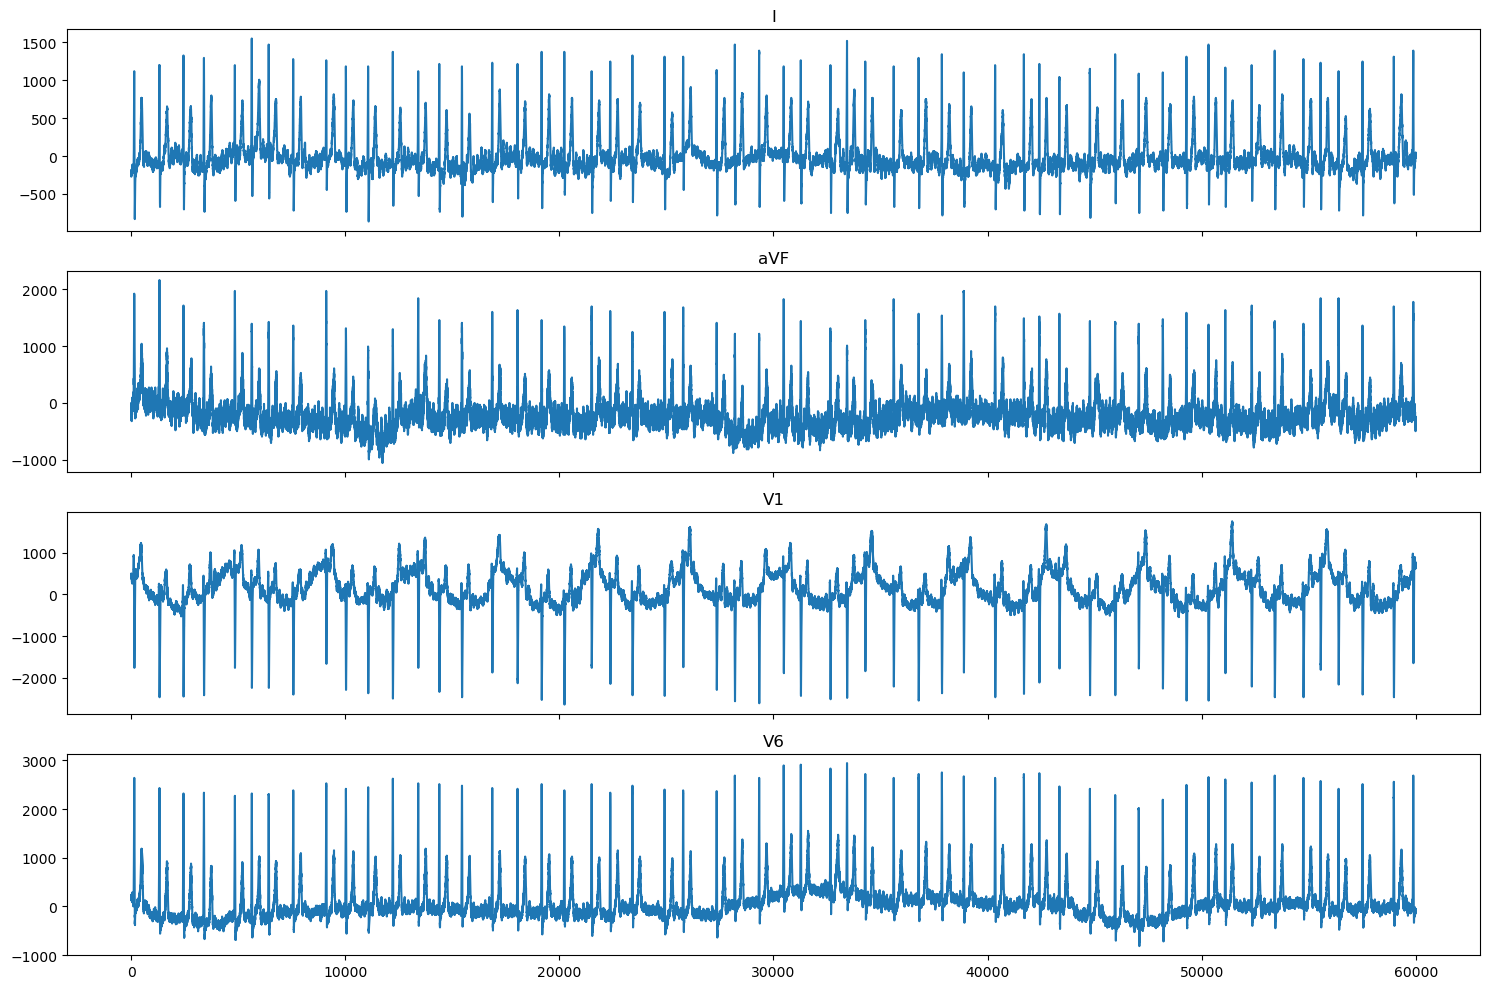

In [87]:
import matplotlib.pyplot as plt

# Assuming 'ecg_leads' is the variable containing the ECG data
# Assuming 'channels' is the list of channel names you mentioned

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(15, 10))

# Iterate over each channel and plot the ECG data
for i, channel in enumerate(channels[:4]):
    axs[i].plot(ecg_leads[:, i])
    axs[i].set_title(channel)

plt.tight_layout()
plt.show()






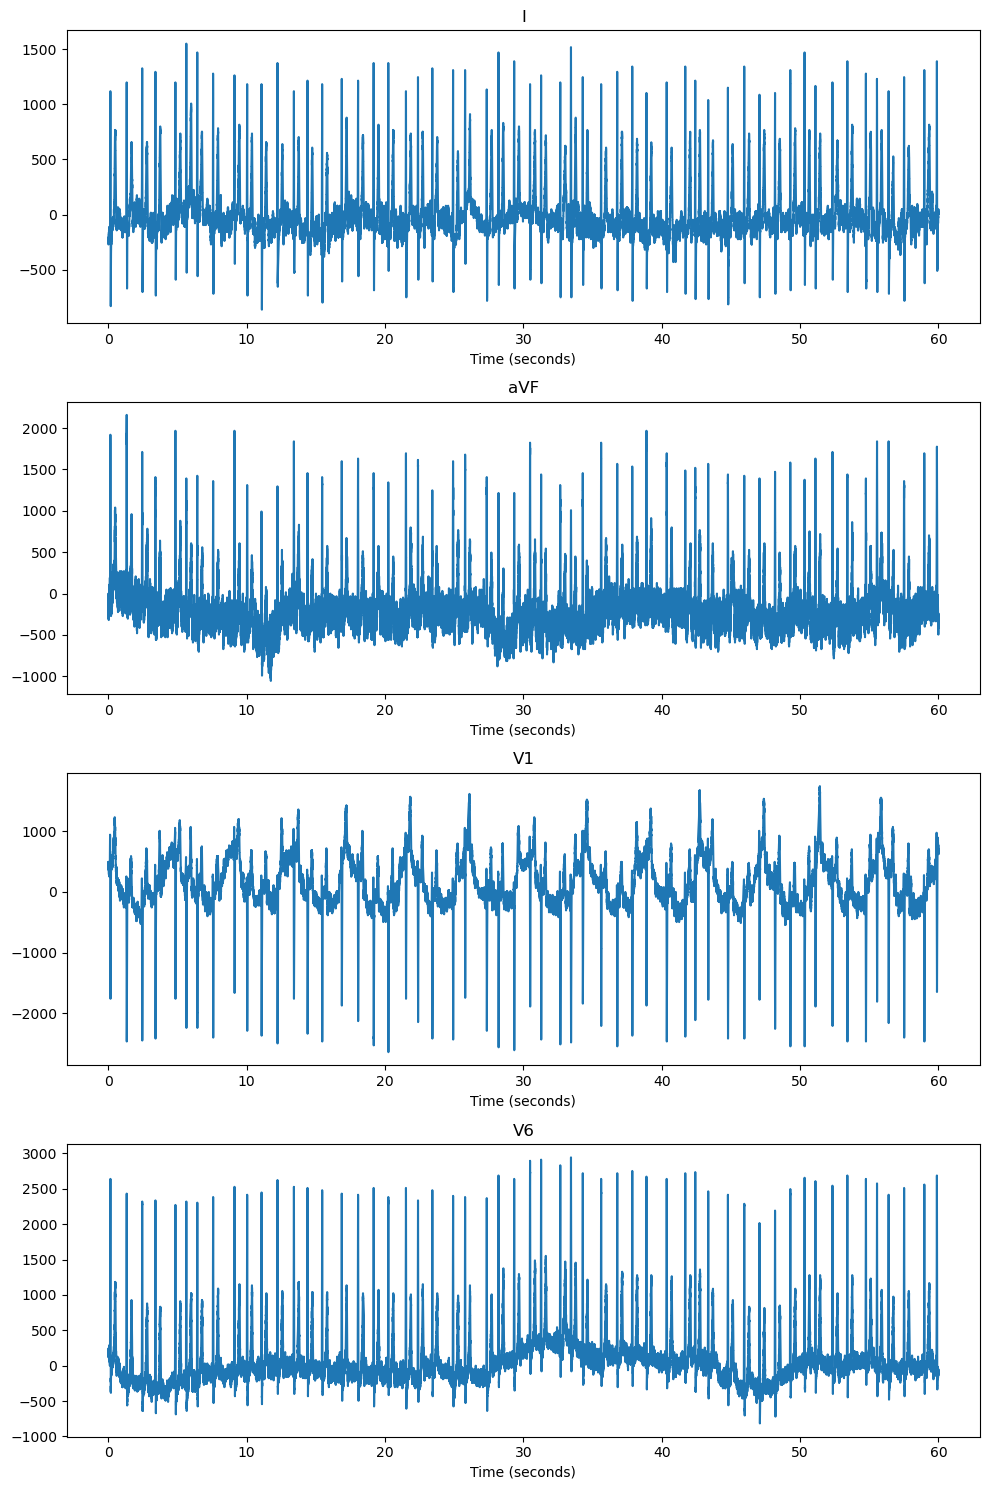

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'ecg_leads' is the variable containing the ECG data
# Assuming 'channels' is the list of channel names you mentioned

sample_rate = 1000  # Sample rate of 1000 samples per second

fig, axs = plt.subplots(nrows=4, sharex=False, figsize=(10, 15))

# Iterate over each channel and plot the ECG data
for i, channel in enumerate(channels[:4]):
    time = np.linspace(0, ecg_leads.shape[0] / sample_rate, ecg_leads.shape[0])
    axs[i].plot(time, ecg_leads[:, i])
    axs[i].set_title(channel)
    axs[i].set_xlabel('Time (seconds)')

plt.tight_layout()
plt.show()






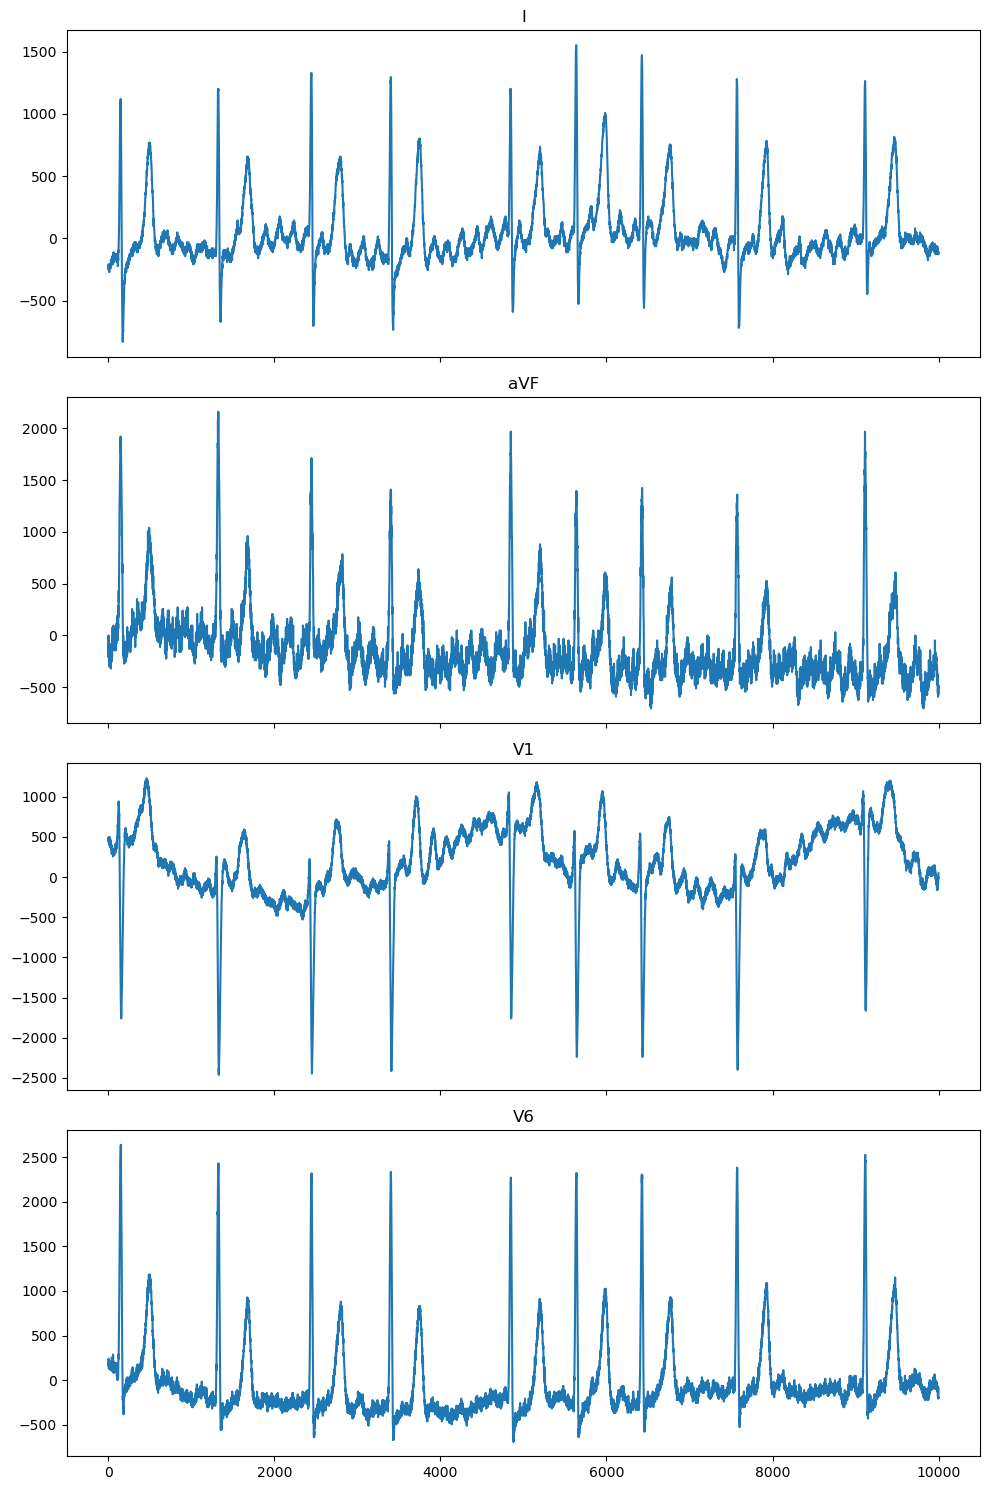

In [100]:
import matplotlib.pyplot as plt

# Assuming 'ecg_leads' is the variable containing the ECG data
# Assuming 'channels' is the list of channel names you mentioned

sample_rate = 1000  # Sample rate of 1000 samples per second
duration = 10  # Duration to visualize in seconds

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(10, 15))

# Calculate the number of samples to visualize
num_samples = int(sample_rate * duration)

# Iterate over each channel and plot the first 10 seconds of ECG data
for i, channel in enumerate(channels[:4]):
    axs[i].plot(ecg_leads[:num_samples, i])
    axs[i].set_title(channel)

plt.tight_layout()
plt.show()




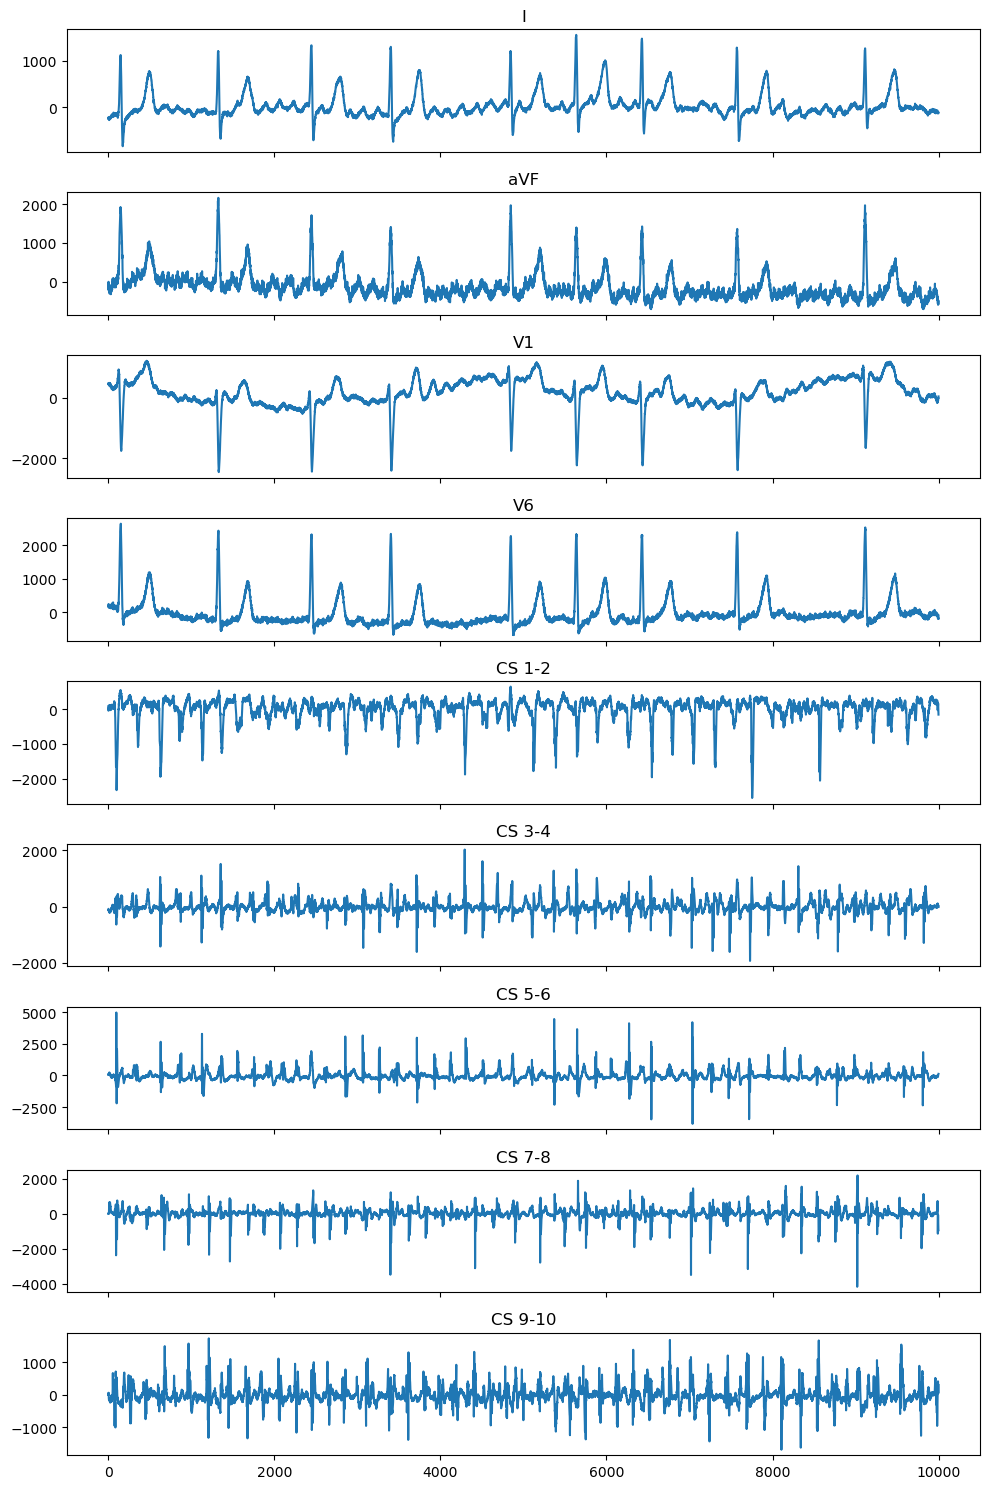

In [101]:
import matplotlib.pyplot as plt

# Assuming 'ecg_leads' is the variable containing the ECG data
# Assuming 'channels' is the list of channel names you mentioned

sample_rate = 1000  # Sample rate of 1000 samples per second
duration = 10  # Duration to visualize in seconds

fig, axs = plt.subplots(nrows=9, sharex=True, figsize=(10, 15))

# Calculate the number of samples to visualize
num_samples = int(sample_rate * duration)

# Iterate over each channel and plot the first 10 seconds of ECG data
for i, channel in enumerate(channels[:9]):
    if i < 4:
        axs[i].plot(ecg_leads[:num_samples, i])
    else:
        axs[i].plot(intracardiac_leads[:num_samples, i-4])  # Plot intracardiac leads
    axs[i].set_title(channel)

plt.tight_layout()
plt.show()
